In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merged = pd.merge(city_data, ride_data, on = "city")

# Display the data table for preview
merged.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

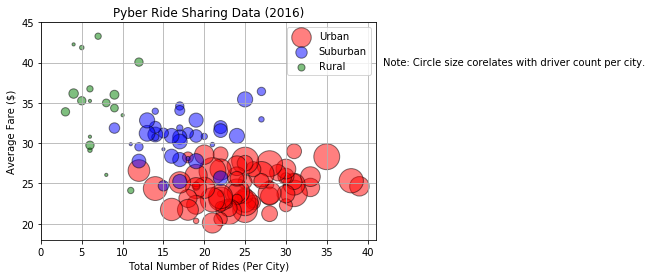

In [2]:
# Obtain the x and y coordinates for each of the three city types
df = merged.set_index("type")
urban = df.loc["Urban",["city"]]
sub = df.loc["Suburban",["city"]]
rural = df.loc["Rural",["city"]]

#x-axis
x_urban = urban["city"].value_counts()
x_sub = sub["city"].value_counts()
x_rural = rural["city"].value_counts()

#y-axis
y_urban = df.loc["Urban"].groupby("city")["fare"].mean()
y_sub = df.loc["Suburban"].groupby("city")["fare"].mean()
y_rural = df.loc["Rural"].groupby("city")["fare"].mean()

#size of the scatter
s_urban = city_data.loc[city_data["type"]=="Urban","driver_count"]
s_sub = city_data.loc[city_data["type"]=="Suburban","driver_count"]
s_rural = city_data.loc[city_data["type"]=="Rural","driver_count"]

# Build the scatter plots for each city types
plt.scatter(x_urban, y_urban, marker="o", facecolors="red", edgecolors="black", label="Urban", s=s_urban*10, alpha=0.5)
plt.scatter(x_sub, y_sub, marker="o", facecolors="blue", edgecolors="black", label="Suburban", s=s_sub*10, alpha=0.5)
plt.scatter(x_rural, y_rural, marker="o", facecolors="green", edgecolors="black", label="Rural", s=s_rural*10, alpha=0.5)

# Incorporate the other graph properties
plt.grid()
plt.xlim(0, 41)
plt.ylim(18, 45)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
plt.legend(loc="best")

# Incorporate a text label regarding circle size
plt.text(58, 40,'Note: Circle size corelates with driver count per city.', horizontalalignment='center', verticalalignment='center')

# Save Figure
plt.savefig("pyber_scatter.png")

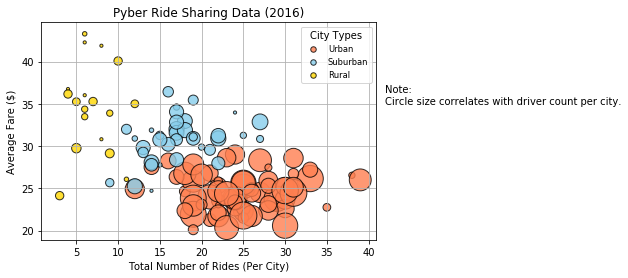

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

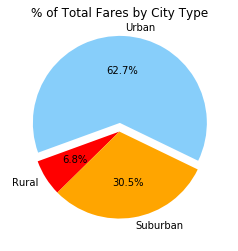

In [3]:
# Calculate Type Percents
total=merged.groupby("type")["fare"].sum()

# Build Pie Chart
labels=total.keys()
colors = ["red", "orange", "lightskyblue"]
explode = (0, 0, 0.1)
plt.pie(total, explode=explode, colors=colors, labels=labels, autopct="%1.1f%%", shadow=False, startangle=200)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("pyber_pie_fares.png")

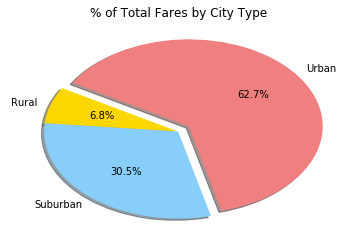

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

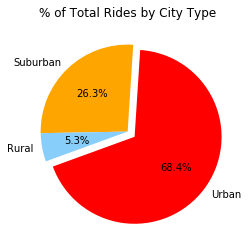

In [4]:
# Calculate Ride Percents
total=merged["type"].value_counts()

# Build Pie Chart
labels=total.keys()
colors = ["red", "orange", "lightskyblue"]
explode = (0.1, 0, 0)
plt.pie(total, explode=explode, colors=colors, labels=labels, autopct="%1.1f%%", shadow=False, startangle=200)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("pyber_pie_rides.png")

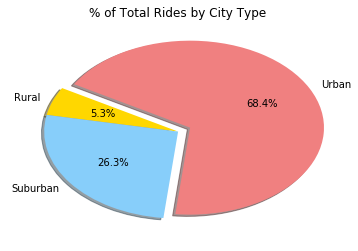

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

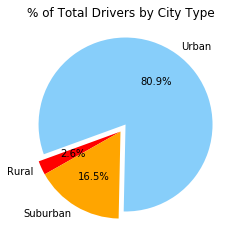

In [5]:
# Calculate Ride Percents
total=city_data.groupby("type")["driver_count"].sum()

# Build Pie Chart
labels=total.keys()
colors = ["red", "orange", "lightskyblue"]
explode = (0, 0, 0.1)
plt.pie(total, explode=explode, colors=colors, labels=labels, autopct="%1.1f%%", shadow=False, startangle=200)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("pyber_pie_drivers.png")

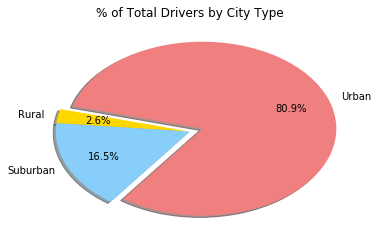

In [6]:
# Show Figure
plt.show()